# Exercício 06 - Aula 07: 18/09/2023



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Exercício

Realize uma classificação usando o classificador de arvore de decisão, o dataset do titanic para prever se a pessoa sobreviveu ou não.

Imprima a matriz de confusão e verifique se se modelo possui uma boa acurácia e precisão.

Em seguida compare com os resultados com uma random forest

Etapas:
1. Carregue a base
2. Explore os dados, verifique se precisam de algum tratamento
3. Verifique a necessidade de escalonamento
4. Crie um pipeline e adicione o escalonamento (se necessário) e o estimador
5. Faça o fit do modelo e verifique as métricas
6. Replique para os demais estimadores

### Tratando Dataset

In [2]:
df = pd.read_csv('Datasets/Titanic-Dataset.csv')

In [3]:
pd.set_option('display.max_column', None)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [8]:
df_norm = pd.DataFrame({
  'Survived': df['Survived'],
  'Pclass':df['Pclass'],
  'Sex': df['Sex'],
  'Age': df['Age'],
  'SibSp': df['SibSp'],
  'Parch': df['Parch'],
  'Fare': df['Fare'],
  'Embarked': df['Embarked']
})

In [9]:
df_norm['Age'].fillna(df_norm['Age'].median(), inplace=True)
df_norm = df_norm.dropna(subset=['Embarked'])

In [10]:
df_norm.shape

(889, 8)

In [11]:
df_norm.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()
df_norm['Sex'] = le.fit_transform(df_norm['Sex'])
df_norm['Embarked'] = le.fit_transform(df_norm['Embarked'])

In [14]:
df_norm.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


/home/pedropadilha/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


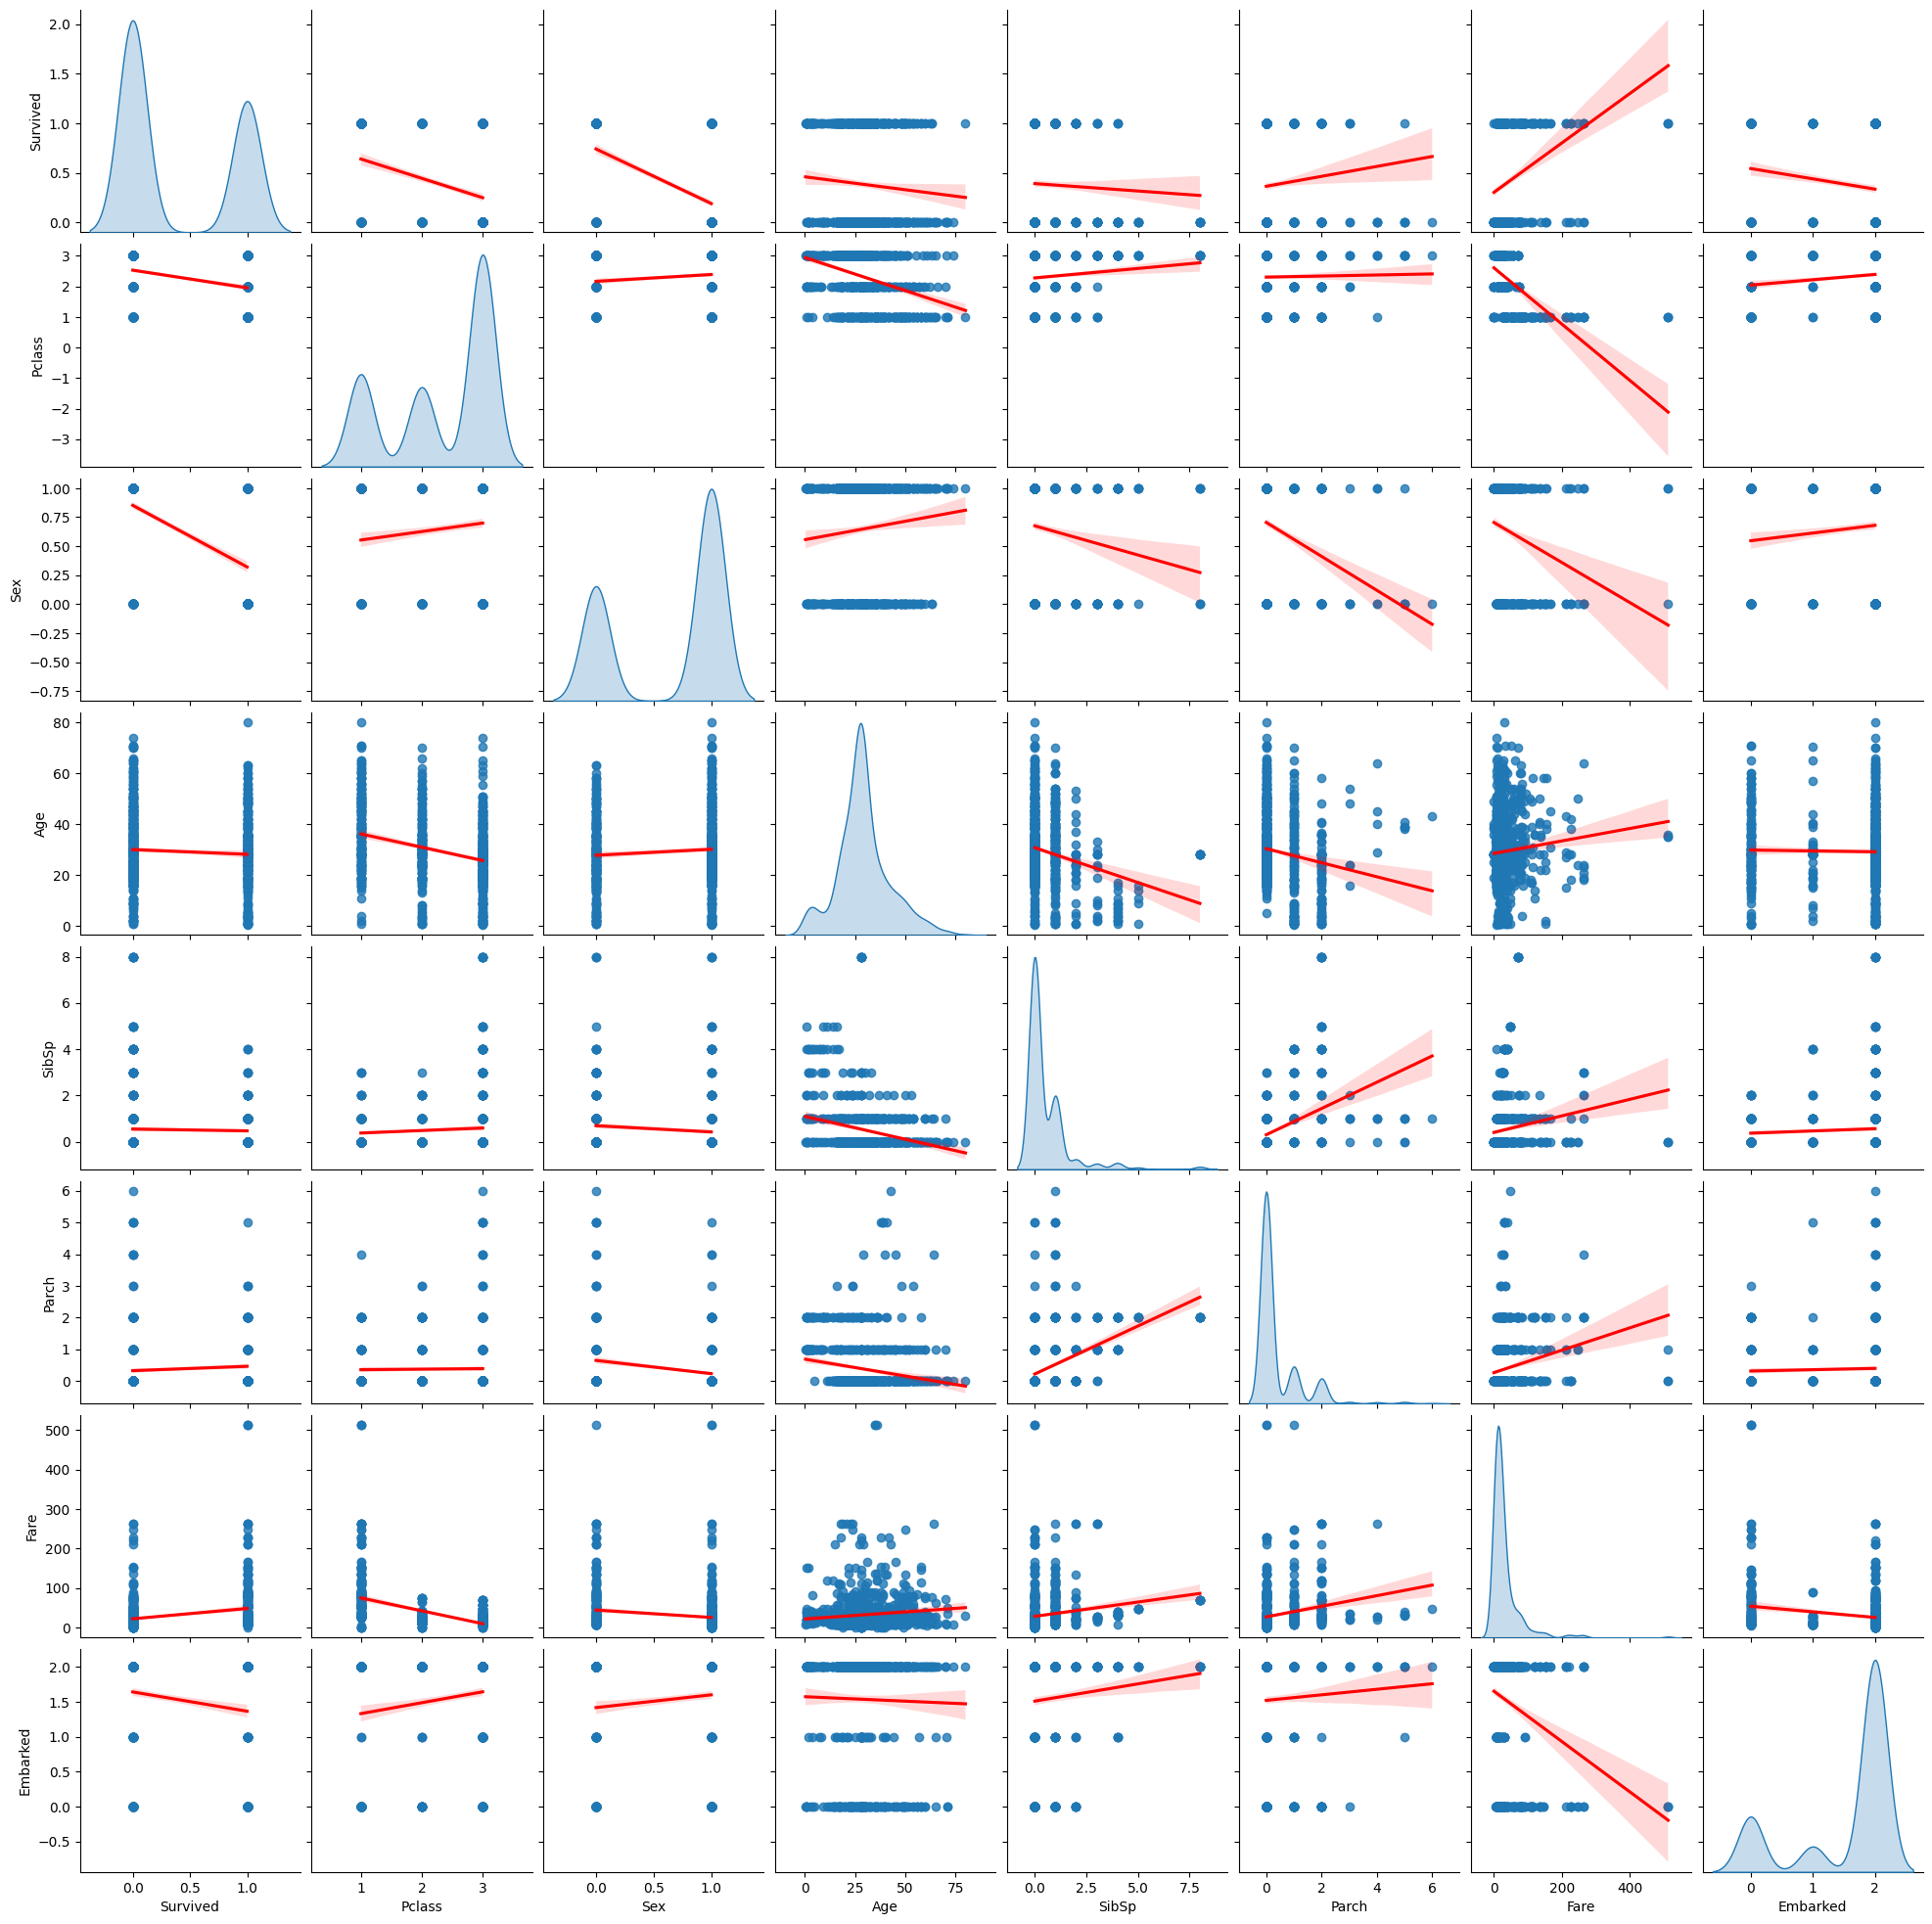

In [15]:
sns.pairplot(df_norm, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})

<Axes: >

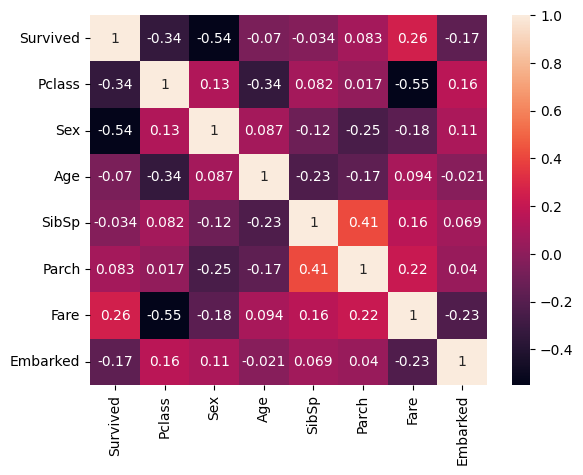

In [16]:
sns.heatmap(df_norm.corr(), annot=True)

In [17]:
df_norm.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.315152,0.524184,0.382452,32.096681,1.535433
std,0.486260,0.834700,0.477538,12.984932,1.103705,0.806761,49.697504,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


### Árvore de Decisão

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
X = df_norm.drop('Survived', axis=1)
y = df_norm['Survived']

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42, stratify=y)

pipeline = Pipeline([('clf', DecisionTreeClassifier(random_state=42))])
pipeline.fit(X_train, y_train)

y_pred_test = pipeline.predict(X_test)

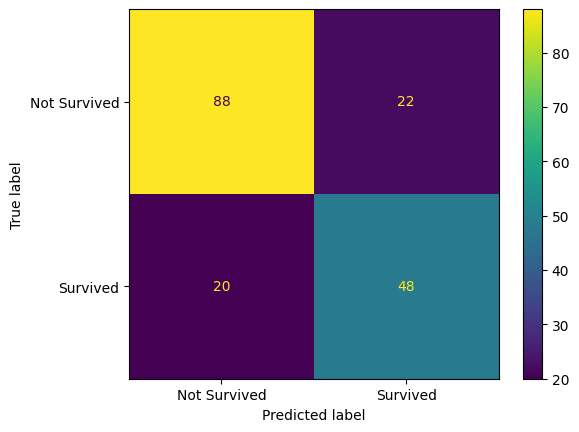

Accuracy: 0.76

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       110
           1       0.69      0.71      0.70        68

    accuracy                           0.76       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.77      0.76      0.76       178



In [21]:
accuracy_dt_norm = accuracy_score(y_test, y_pred_test)

ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, display_labels=['Not Survived', 'Survived'])
plt.show()

print(f"Accuracy: {round(accuracy_dt_norm, 2)}")
print(f"\n{classification_report(y_test, y_pred_test)}")

### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
X = df_norm.drop('Survived', axis=1)
y = df_norm['Survived']

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42, stratify=y)

pipeline_rf = Pipeline([('clf', RandomForestClassifier(random_state=42))])
pipeline_rf.fit(X_train, y_train)

y_pred_rf = pipeline_rf.predict(X_test)

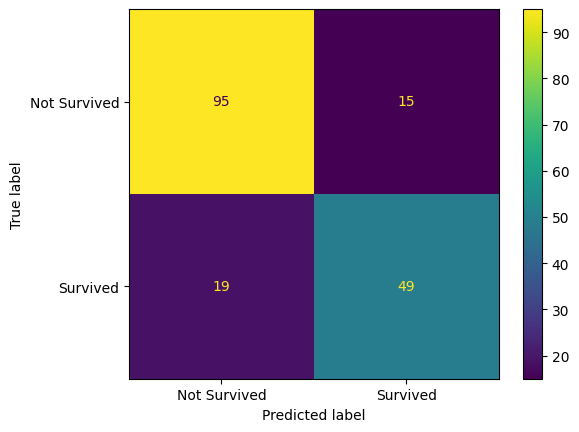

Accuracy: 0.81

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       110
           1       0.69      0.71      0.70        68

    accuracy                           0.76       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.77      0.76      0.76       178



In [24]:
accuracy_rf_norm = accuracy_score(y_test, y_pred_rf)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=['Not Survived', 'Survived'])
plt.show()

print(f"Accuracy: {round(accuracy_rf_norm, 2)}")
print(f"\n{classification_report(y_test, y_pred_test)}")

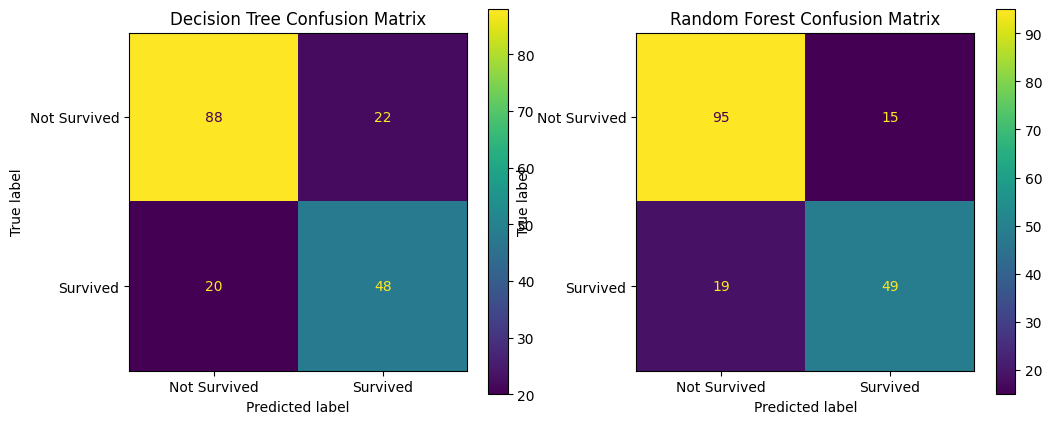

Accuracy: 0.76 | Decision Tree
Accuracy: 0.81 | Random Forest


In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, display_labels=['Not Survived', 'Survived'], ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
ConfusionMatrixDisplay.from_estimator(pipeline_rf, X_test, y_test, display_labels=['Not Survived', 'Survived'], ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
plt.show()

print(f"Accuracy: {round(accuracy_dt_norm, 2)} | Decision Tree\nAccuracy: {round(accuracy_rf_norm, 2)} | Random Forest")